<div>
<a href="https://github.com/groupmm/edu_novfct"><img src="data/Edu_NovFct_Teaser.png" width=100% style="float: right;" alt="PCP Teaser"></a>
</div>

<div>
<h2>Figure 1<br> <small>Idealized novelty functions for various MIR tasks. </small></h2> </div>

This notebook provides code for reproducing the subfigures of Figure 1 of the paper.
- Figure 1a: Musical score of the beginning of the second piano etude from Op. 100 by Burgmüller.
- Figure 1b: Audio recording of the corresponding excerpt.
- Figure 1c: Onset detection.
- Figure 1d: Beat tracking.
- Figure 1e: Downbeat (measure) tracking.
- Figure 1f: Boundary estimation for music structure analysis.

### Figure 1a

Musical score of the beginning of the second piano etude from Op. 100 by Burgmüller.

<img src="./data/example_Burgmueller_score.png" width="700px" align="left" alt="example_Burgmueller_score.png">

### Figure 1b

Audio recording of the corresponding excerpt.

<audio src="./data/example_Burgmueller_audio.mp3" type="audio/mpeg" controls="controls"></audio>

In the following code cell, we do the following:
* Import all necessary libraries and functions used in the notebook.
* Set the configurations for the figures.
* Plot the waveform of the audio excerpt (Figure 1b).

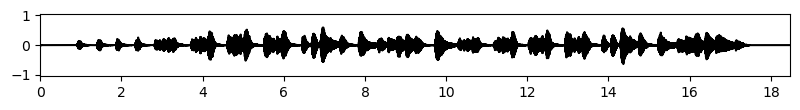

In [1]:
import os
import numpy as np
import librosa
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import libfmp.b

%matplotlib inline

### load audio wav 
fn_wav = os.path.join('./data/example_Burgmueller_audio.wav')
x, Fs = librosa.load(fn_wav)
x_duration = len(x)/Fs

### Settings for figures
export = False
figsize=(8.0,1.2)
figsize_wav=(8.1,1.2)
dpi = 100
plot_xlim = [0, x_duration]
plot_ylim_wav = [-1.05, 1.05]
plot_ylim = [0, 1.1]

### Figure01b
libfmp.b.plot_signal(x, Fs, color='k', dpi=dpi, figsize=figsize_wav, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim_wav)
plt.xticks(np.arange(0, x_duration, 2), np.arange(0, x_duration, 2, dtype = int))
plt.tight_layout()

output_path = os.path.join('./export/Figure01b.png')
if export==True:
    plt.savefig(output_path)

### Figure 1c 

Onset detection.

In the following code cell, we define functions for reading annotations (e.g., time positions of onsets), converting the annotations into ideal binary novelty functions, apply a Gaussian smoothing kernel, and plot the resulting novelty function (Figure 1c). 

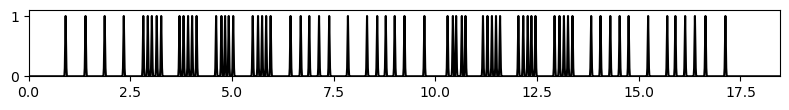

In [2]:
### Figure01c
def read_anncsv(csvpath):
    """ Read the provided .csv and organize the four types of annotations
    
    Args:
        csvpath (str): Filepath of annotations.
    Returns:
        ann_dict (dict): Dictionary of annotations for onset, beat, downbeat, and structure. 
    """
    ann_info = np.array(pd.read_csv(csvpath, header = None))
    ann_dict = {'onset':[], 'beat':[], 'downbeat':[], 'structure':[]}
    for ann_str in ann_info[1:]:
        time, ann_type = ann_str[0].split(';')
        ann_dict[ann_type.strip('"')].append(float(time))
    return ann_dict

def generate_nov_from_events(events, dur_sec = None, Fs_nov =100, sigma= None, max_norm = False):
    """ Generate a frame-based idealized novelty function from the time sequence of events.
    
    Args:
        events (np.ndarray): Numpy array of time points (in second) of events (e.g., onsets).
        dur_sec (float): Duration (in seconds) of the generated novelty function. If None, it will be set as the last element of events.
        Fs_nov (float): Frame rate (in frame-per-second) of the generated novelty function.
        sigma (float): Sigma of 1D Gaussian filter. If None, no filter will be applied.
        max_norm (bool): Apply max normalization before returning the generated novely function.
    Returns:
        nov (np.ndarray): Numpy array of the generated novelty function.
    """

    if dur_sec:
        end_frame = round(dur_sec*Fs_nov)+1
    else:
        end_frame = round(events[-1]*Fs_nov)+1 
    nov = np.zeros((end_frame, ))
    for ind, event in enumerate(list(events)):
        nov[round(event*Fs_nov)] = 1
        
    if sigma:
        nov = gaussian_filter1d(nov, sigma = sigma, mode = 'constant')
    if max_norm==True:
        nov = nov/nov.max()
        
    return nov

Fs_nov = 100 ## frame-rate of the ideal novelty function
csvpath = './data/example_Burgmueller_ann.csv'
ann_dict =read_anncsv(csvpath )
### Frame-based idealized novelty function for onsets
ideal_onset = generate_nov_from_events(ann_dict['onset'], dur_sec = x_duration, Fs_nov = Fs_nov, sigma = 1, max_norm = True)

libfmp.b.plot_signal(ideal_onset, Fs_nov, color='k', dpi=dpi, figsize=figsize, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure01c.png')
if export == True:
    plt.savefig(output_path)

### Figure 1d

Beat tracking.

In the following code cell, we generate and plot an idealized novelty function for beat tracking (Figure 1d).

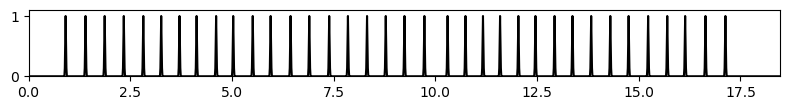

In [3]:
### Figure01d
#### Frame-based idealized novelty function for beats
ideal_beat = generate_nov_from_events(ann_dict['beat'], dur_sec = x_duration, Fs_nov = Fs_nov, sigma = 1, max_norm = True)

libfmp.b.plot_signal(ideal_beat, Fs_nov, color='k', dpi=dpi, figsize=figsize, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure01d.png')
if export == True:
    plt.savefig(output_path)

### Figure 1e

Downbeat (measure) tracking.

In the following code cell, we generate and plot an idealized novelty function for downbeat tracking (Figure 1e).

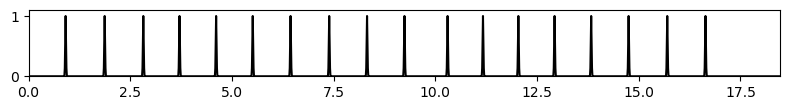

In [4]:
### Figure01e
#### Frame-based idealized novelty function for downbeats
ideal_dbeat = generate_nov_from_events(ann_dict['downbeat'], dur_sec = x_duration, Fs_nov = Fs_nov, sigma = 1, max_norm = True)

libfmp.b.plot_signal(ideal_dbeat, Fs_nov, color='k', dpi=dpi, figsize=figsize, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure01e.png')
if export == True:
    plt.savefig(output_path)

### Figure 1f

Boundary estimation for music structure analysis.

In the following code cell, we generate and plot an idealized novelty function for boundary estimation (Figure 1f).

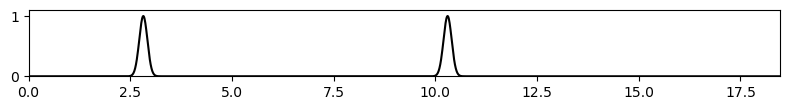

In [5]:
### Figure01f
#### Frame-based idealized novelty function for structure
ideal_struct = generate_nov_from_events(ann_dict['structure'], dur_sec = x_duration, Fs_nov = Fs_nov, sigma = 10, max_norm = True)

libfmp.b.plot_signal(ideal_struct, Fs_nov, color='k', dpi=dpi, figsize=figsize, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure01f.png')
if export == True:
    plt.savefig(output_path)

### Further Notes and Links


<ul>
<li><span style="color:black">
Meinard Müller and Ching-Yu Chiu: <a href="https://ieeexplore.ieee.org/document/6353546"><strong>A Basic Tutorial on Novelty and Activation Functions for Music Signal Processing.</strong></a> Transaction of the International Society for Music Information Retrieval (TISMIR), ??: ??–??, 2024. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="./data/bibtex_MuellerC24_EduNovFct_TISMIR.txt"> Bibtex </a>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="https://github.com/groupmm/edu_novfct">GitHub</a></span></li>

</ul> 

<div>
<a href="https://opensource.org/licenses/MIT"><img src="data/Edu_NovFct_License.png" width=100% style="float: right;" alt="PCP License"></a>
</div>